<p style="background-color:#32CD32;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>Lineer Regression Project - CO2 Emissions</b></p>

<div style="text-align: center;">
    <img src="https://media.istockphoto.com/id/1367840320/vector/vector-of-cars-on-a-highway-with-carbon-dioxide-clouds.jpg?s=612x612&w=0&k=20&c=6L-1mtr1eBZ0_RabEqB4cpw7ATRNzg2JTnQMdtRS5co=" width="600" height="600"/>
</div>

# <font color='green'> <b>Introduction</b><font color='black'> 

This project is a data analytics and machine learning study designed to predict CO2 emissions from motor vehicles. It aims to analyze the impact of features such as engine size, number of cylinders, and fuel consumption on carbon emissions. The project begins with **Exploratory Data Analysis (EDA)** to understand the structure of the dataset. Then, CO2 emissions are predicted using **Simple Linear Regression** and **Multiple Linear Regression** models. Finally, the performance of the models is evaluated using accuracy metrics, providing insights for real-world applications.

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#understanding-dataset">Understanding The Dataset</a></li>
<li><a href="#data-visualization">Data Visualization</a></li>
<li><a href="#simp-linear">Simple Linear Regression Model</a></li>
<li><a href="#multi-linear">Multiple Linear Regression Model</a></li>
<li><a href="#final-model">Final Model and Prediction</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

<a id='import-library'></a>
# <font color='green'> <b>Importing Libraries</b><font color='black'> 

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import missingno as msno
import plotly.express as px

from skimpy import skim

from scipy.stats import skew # for skewness

from sklearn.model_selection import train_test_split                              # for train-test split
from sklearn.linear_model import LinearRegression                                 # for LinearRegression model fitting
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score     # for error metrics
from yellowbrick.regressor import ResidualsPlot                                   # for residuals plot
from yellowbrick.regressor import PredictionError                                 # for another residuals plot
from sklearn.preprocessing import PolynomialFeatures                              # for polynomial conversion
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler      # for scaling
from sklearn.model_selection import cross_validate, cross_val_score               # for cross validate (cv)
from sklearn.model_selection import GridSearchCV                                  # for Grid Search
from sklearn.linear_model import Ridge, Lasso, ElasticNet                         # for regularization
 
%matplotlib inline  

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

<a id='loading-dataset'></a>
# <font color='green'> <b>Loading The Dataset</b><font color='black'> 

In [8]:
co2 = pd.read_csv('co2.csv')
df = co2.copy()
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**About Dataset**
- This dataset contains information about various vehicles' carbon dioxide (CO2) emissions and fuel consumption. 
- In the context of Machine Learning (ML), this dataset is often used to predict CO2 emissions based on vehicle characteristics or to analyze fuel efficiency of vehicles. 
- The goal could be to predict CO2 emissions or fuel consumption based on the features of the vehicles.
- There are total 7385 rows and 12 columns. 

**The columns in the dataset can be described as follows:**

1. **Make**: The brand of the vehicle.
2. **Model**: The model of the vehicle.
3. **Vehicle Class**: The class of the vehicle (e.g., compact, SUV).
4. **Engine Size(L)**: The engine size in liters.
5. **Cylinders**: The number of cylinders in the engine.
6. **Transmission**: The type of transmission (e.g., automatic, manual).
7. **Fuel Type**: The type of fuel used (e.g., gasoline, diesel).
8. **Fuel Consumption City (L/100 km)**: Fuel consumption in the city (liters per 100 kilometers).
9. **Fuel Consumption Hwy (L/100 km)**: Highway (out-of-city) fuel consumption.
10. **Fuel Consumption Comb (L/100 km)**: Combined (city and highway) fuel consumption.
11. **Fuel Consumption Comb (mpg)**: Combined fuel consumption in miles per gallon.
12. **CO2 Emissions(g/km)**: CO2 emissions in grams per kilometer.

**Model**

**The "Model" column includes terms that identify specific features or configurations of vehicles:**
- `4WD/4X4`: Four-wheel drive. A drive system where all four wheels receive power.
- `AWD`: All-wheel drive. Similar to 4WD but often with more complex mechanisms for power distribution.
- `FFV`: Flexible-fuel vehicle. Vehicles that can use multiple types of fuel, such as both gasoline and ethanol blends.
- `SWB`: Short wheelbase.
- `LWB`: Long wheelbase.
- `EWB`: Extended wheelbase.

**Transmission**

**The "Transmission" column indicates the type of transmission system in the vehicle:**
- `A`: Automatic. A transmission type that operates without the need for the driver to manually change gears.
- `AM`: Automated manual. A version of a manual transmission that is automated.
- `AS`: Automatic with select shift. An automatic transmission that allows for manual intervention.
- `AV`: Continuously variable. A transmission that uses continuously varying ratios instead of fixed gear ratios.
- `M`: Manual. A transmission type that requires the driver to manually change gears.
- `3 - 10`: Number of gears in the transmission.

**Fuel Type**

**The "Fuel Type" column specifies the type of fuel used by the vehicle:**
- `X`: Regular gasoline.
- `Z`: Premium gasoline.
- `D`: Diesel.
- `E`: Ethanol (E85).
- `N`: Natural gas.

**Vehicle Class**

**The "Vehicle Class" column categorizes vehicles by size and type:**
- `COMPACT`: Smaller-sized vehicles.
- `SUV - SMALL`: Smaller-sized sports utility vehicles.
- `MID-SIZE`: Medium-sized vehicles.
- `TWO-SEATER`: Vehicles with two seats.
- `MINICOMPACT`: Very small-sized vehicles.
- `SUBCOMPACT`: Smaller than compact-sized vehicles.
- `FULL-SIZE`: Larger-sized vehicles.
- `STATION WAGON - SMALL`: Smaller-sized station wagons.
- `SUV - STANDARD`: Standard-sized sports utility vehicles.
- `VAN - CARGO`: Vans designed for cargo.
- `VAN - PASSENGER`: Vans designed for passenger transportation.
- `PICKUP TRUCK - STANDARD`: Standard-sized pickup trucks.
- `MINIVAN`: Smaller-sized vans.
- `SPECIAL PURPOSE VEHICLE`: Vehicles designed for special purposes.
- `STATION WAGON - MID-SIZE`: Mid-sized station wagons.
- `PICKUP TRUCK - SMALL`: Smaller-sized pickup trucks.

This dataset can be used to understand the fuel efficiency and environmental impact of vehicles. Machine learning models can use these features to predict CO2 emissions or perform analyses comparing the fuel consumption of different vehicles.

In [10]:
df.sample(5)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
4347,VOLKSWAGEN,TOUAREG,SUV - STANDARD,3.6,6,AS8,X,13.8,10.4,12.2,23,287
5681,CHEVROLET,Tahoe 4WD FFV,SUV - STANDARD,5.3,8,A6,X,15.8,11.1,13.7,21,321
3372,BENTLEY,CONTINENTAL GT CONVERTIBLE,SUBCOMPACT,6.0,12,AS8,Z,19.6,11.7,16.0,18,375
4809,GMC,ACADIA AWD,SUV - STANDARD,2.5,4,A6,X,11.2,9.4,10.4,27,243
7267,PORSCHE,Panamera GTS ST,FULL-SIZE,4.0,8,AM8,Z,15.7,10.5,13.4,21,313


<a id='understanding-dataset'></a>
# <font color='green'> <b>Understanding The Dataset</b><font color='black'> 

In [12]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)', 'CO2 Emissions(g/km)'],
      dtype='object')

In [13]:
# renaming the columns
df.columns = df.columns.str.replace(" (L/100 km)", "").str.replace("(L)", "").str.replace("(g/km)", "").str.replace(" ", "_")
df.columns = df.columns.str.lower()
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb',
       'fuel_consumption_comb_(mpg)', 'co2_emissions'],
      dtype='object')

In [14]:
df.shape

(7385, 12)

In [15]:
df.duplicated().sum()

1103

In [16]:
df = df.drop_duplicates(keep='first') # drop duplicated rows

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6282 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   make                         6282 non-null   object 
 1   model                        6282 non-null   object 
 2   vehicle_class                6282 non-null   object 
 3   engine_size                  6282 non-null   float64
 4   cylinders                    6282 non-null   int64  
 5   transmission                 6282 non-null   object 
 6   fuel_type                    6282 non-null   object 
 7   fuel_consumption_city        6282 non-null   float64
 8   fuel_consumption_hwy         6282 non-null   float64
 9   fuel_consumption_comb        6282 non-null   float64
 10  fuel_consumption_comb_(mpg)  6282 non-null   int64  
 11  co2_emissions                6282 non-null   int64  
dtypes: float64(4), int64(3), object(5)
memory usage: 638.0+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb,6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb_(mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
co2_emissions,6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [19]:
df.describe(include= "object").T

,count,unique,top,freq
make,6282,42,FORD,577
model,6282,2053,F-150 FFV,32
vehicle_class,6282,16,SUV - SMALL,1006
transmission,6282,27,AS6,1139
fuel_type,6282,5,X,3039


In [20]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 6282   │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 12     │ │ float64     │ 4     │                                                          │
│ └───────────────────┴────────┘ │ int32       │ 3     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %   ┃ mean    ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75   ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ engine_size              │   0 │      0 │   3.162 │  1.365 │  0.9 │     2 │     3 │   3.7 │   8.4 │ ▇▆▆▃▁  │  │
│ │ cylinders                │   0 │      0 │   5.619 │  1.846 │    3 │     4 │     6 │     6 │    16 │  ▇▆▃   │  │
│ │ fuel_consumption_city    │   0 │      0 │   12.61 │  3.553 │  4.2 │  10.1 │  12.1 │  14.7 │  30.6 │  ▂▇▅▁  │  │
│ │ fuel_consumption_hwy     │   0 │      0 │   9.071 │  2.279 │    4 │   7.5 │   8.7 │  10.3 │  20.6 │  ▂▇▃▁  │  │
│ │ fuel_consumption_comb    │   0 │      0 │   11.02 │  2.947 │  4.1 │   8.9 │  10.6 │  12.7 │  26.1 │  ▁▇▅▁  │  │
│ │ fuel_consumption_comb_(m │   0 │      0 │   27.41 │  7.245 │   11 │    22 │    27 │    32 │    69 │  ▂▇▃▁  │  │
│ │ pg)                      │     │        │         │        │      │       │       │       │       │        │  │
│ │ co2_emissions            │   0 │      0 │   251.2 │  59.29 │   96 │   208 │   246 │   289 │   522 │ ▁▇▇▃▁  │  │
│ └──────────────────────────┴─────┴────────┴─────────┴────────┴──────┴───────┴───────┴───────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ make                         │      0 │          0 │                           1 │                    6416 │  │
│ │ model                        │      0 │          0 │                         2.3 │                   14158 │  │
│ │ vehicle_class                │      0 │          0 │                           2 │                   12427 │  │
│ │ transmission                 │      0 │          0 │                           1 │                    6282 │  │
│ │ fuel_type                    │      0 │          0 │                           1 │                    6282 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [21]:
df.isnull().sum()

make                           0
model                          0
vehicle_class                  0
engine_size                    0
cylinders                      0
transmission                   0
fuel_type                      0
fuel_consumption_city          0
fuel_consumption_hwy           0
fuel_consumption_comb          0
fuel_consumption_comb_(mpg)    0
co2_emissions                  0
dtype: int64

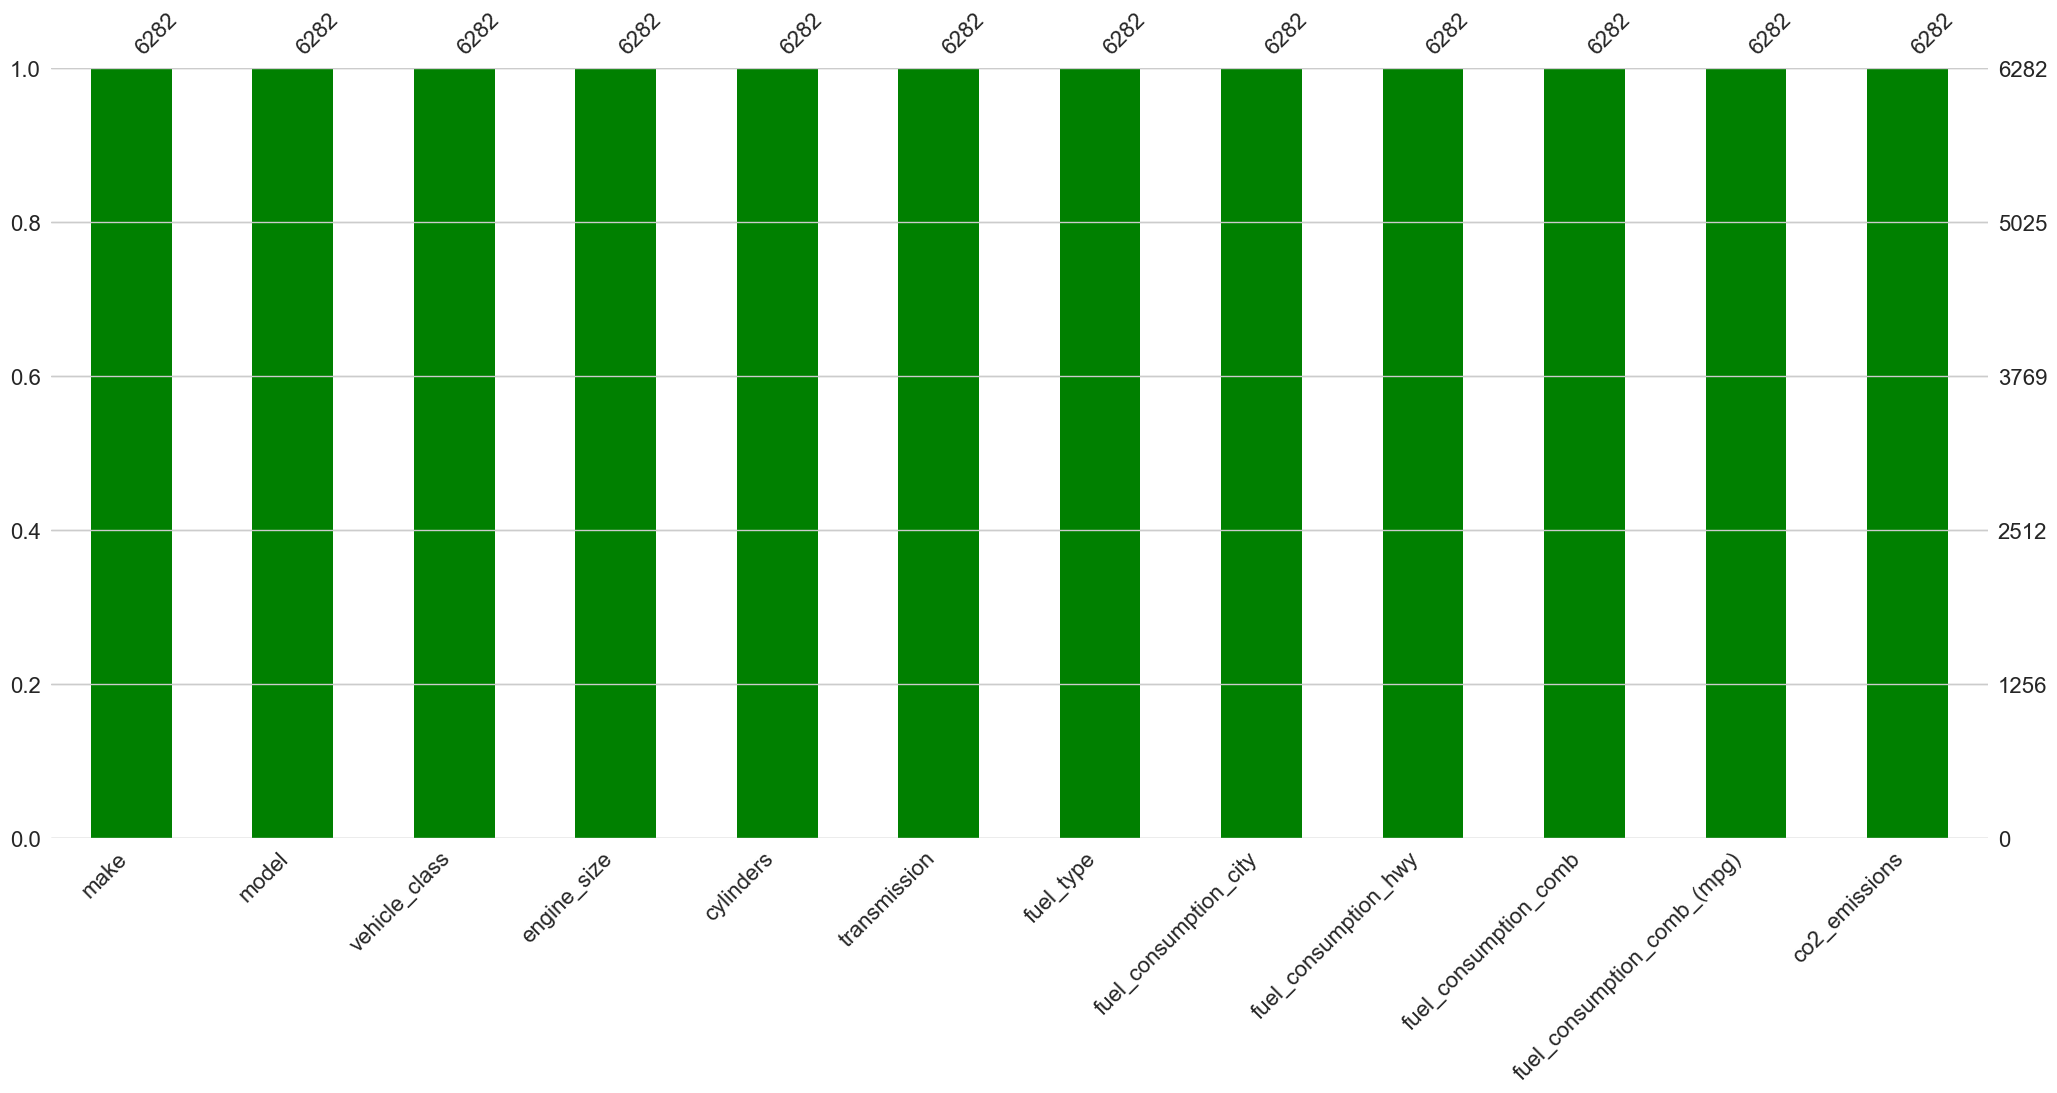

In [22]:
msno.bar(df, color='green');

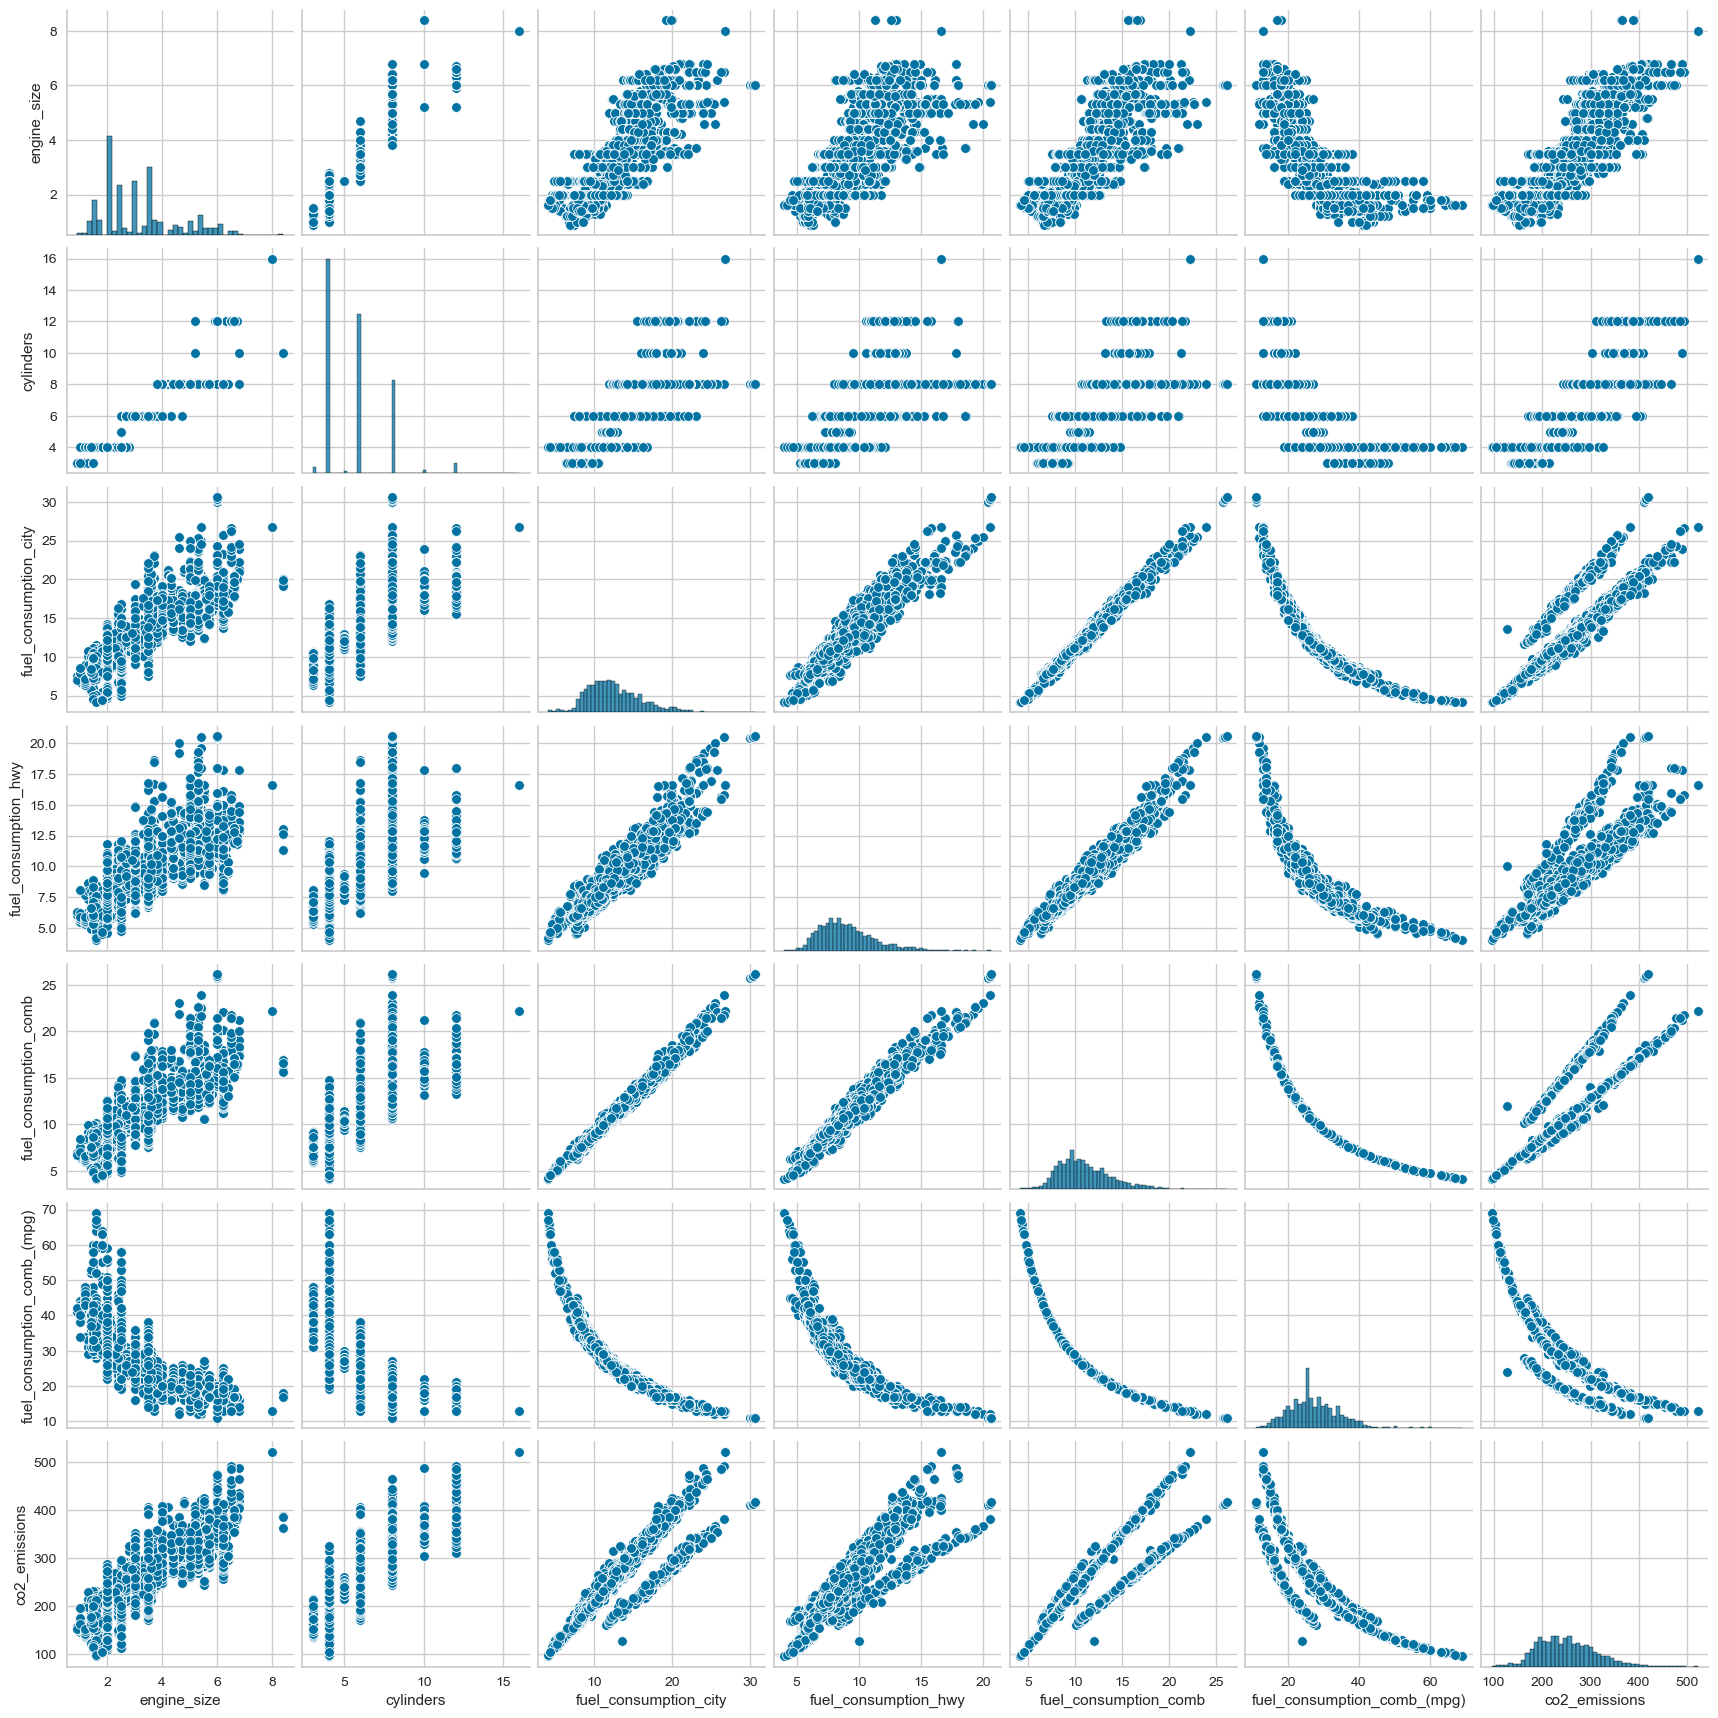

In [23]:
sns.pairplot(df);

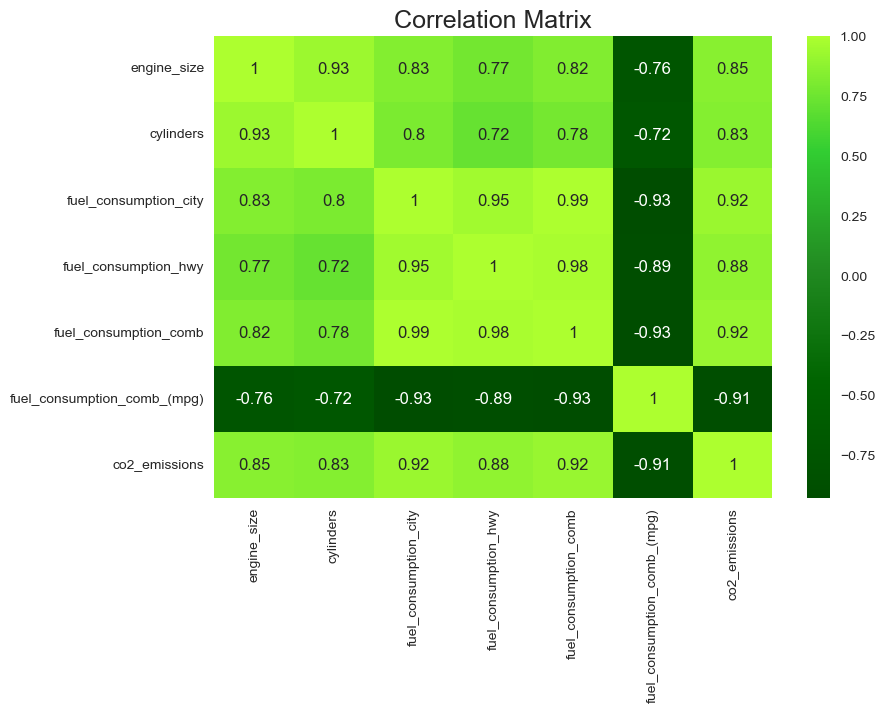

In [24]:
from matplotlib.colors import LinearSegmentedColormap
custom_cmap = LinearSegmentedColormap.from_list("custom_green", [
    "#004d00",  # Çok koyu yeşil
    "#006400",  # Koyu yeşil
    "#228B22",  # Orman yeşili
    "#32CD32",  # Limon yeşili
    "#ADFF2F",  # Sarımsı yeşil
])

numeric_df = df.select_dtypes(exclude="object")

plt.figure(figsize=(9, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap= custom_cmap)

plt.title('Correlation Matrix', fontsize=18)
plt.show()

<a id='data-visualization'></a>
# <font color='green'> <b>Data Visualization</b><font color='black'> 

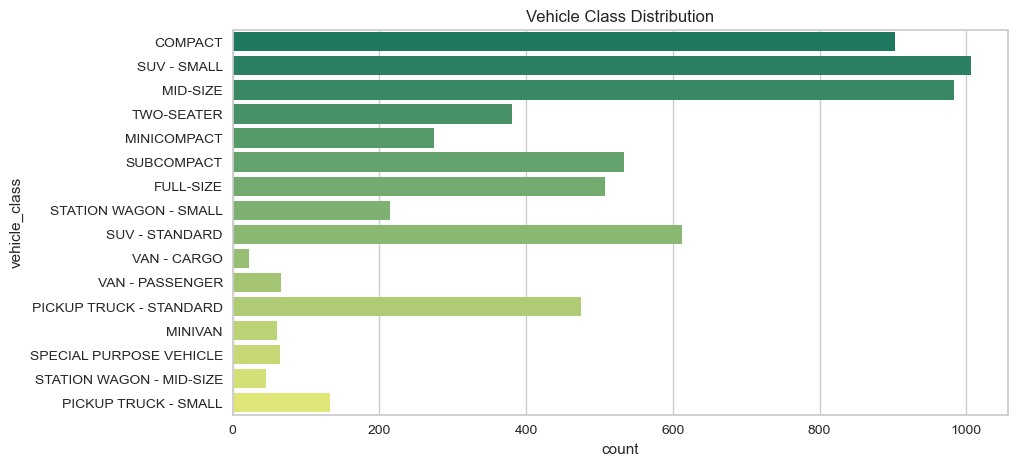

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='vehicle_class', palette='summer')
plt.title('Vehicle Class Distribution')
plt.show()

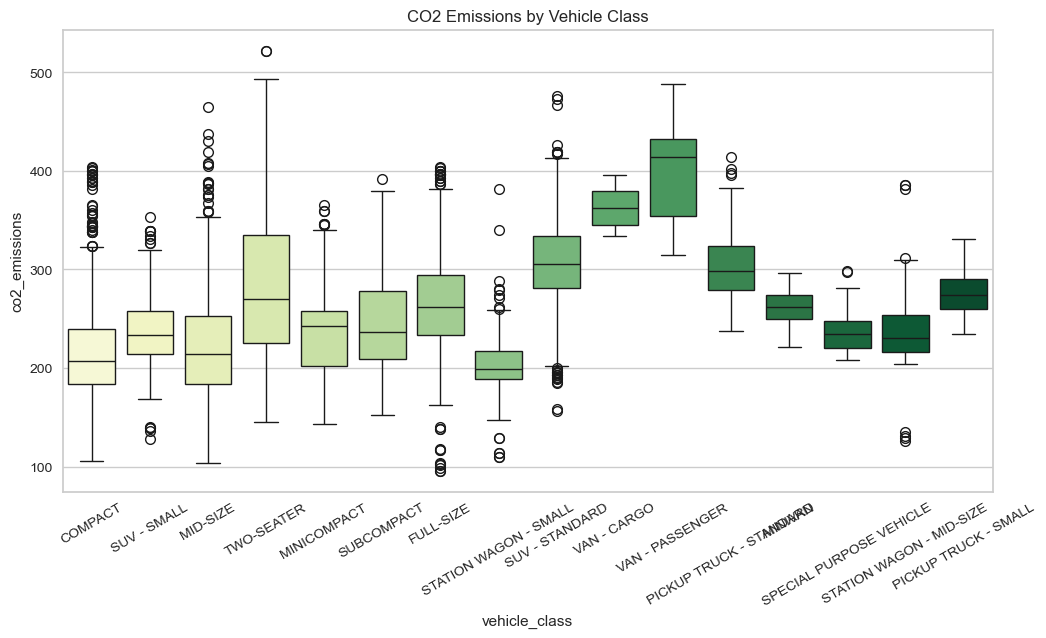

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="vehicle_class", y="co2_emissions", palette="YlGn")

plt.title("CO2 Emissions by Vehicle Class")
plt.xticks(rotation=30)

plt.show()

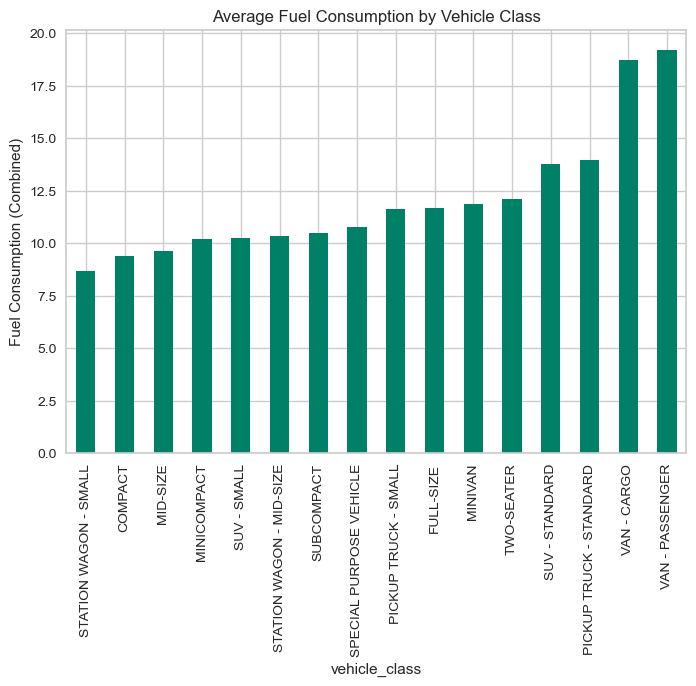

In [28]:
# Average fuel consumption by vehicle class
avg_fuel = df.groupby('vehicle_class')['fuel_consumption_comb'].mean().sort_values()
avg_fuel.plot(kind='bar', cmap='summer')

plt.title('Average Fuel Consumption by Vehicle Class')
plt.ylabel('Fuel Consumption (Combined)')

plt.show()

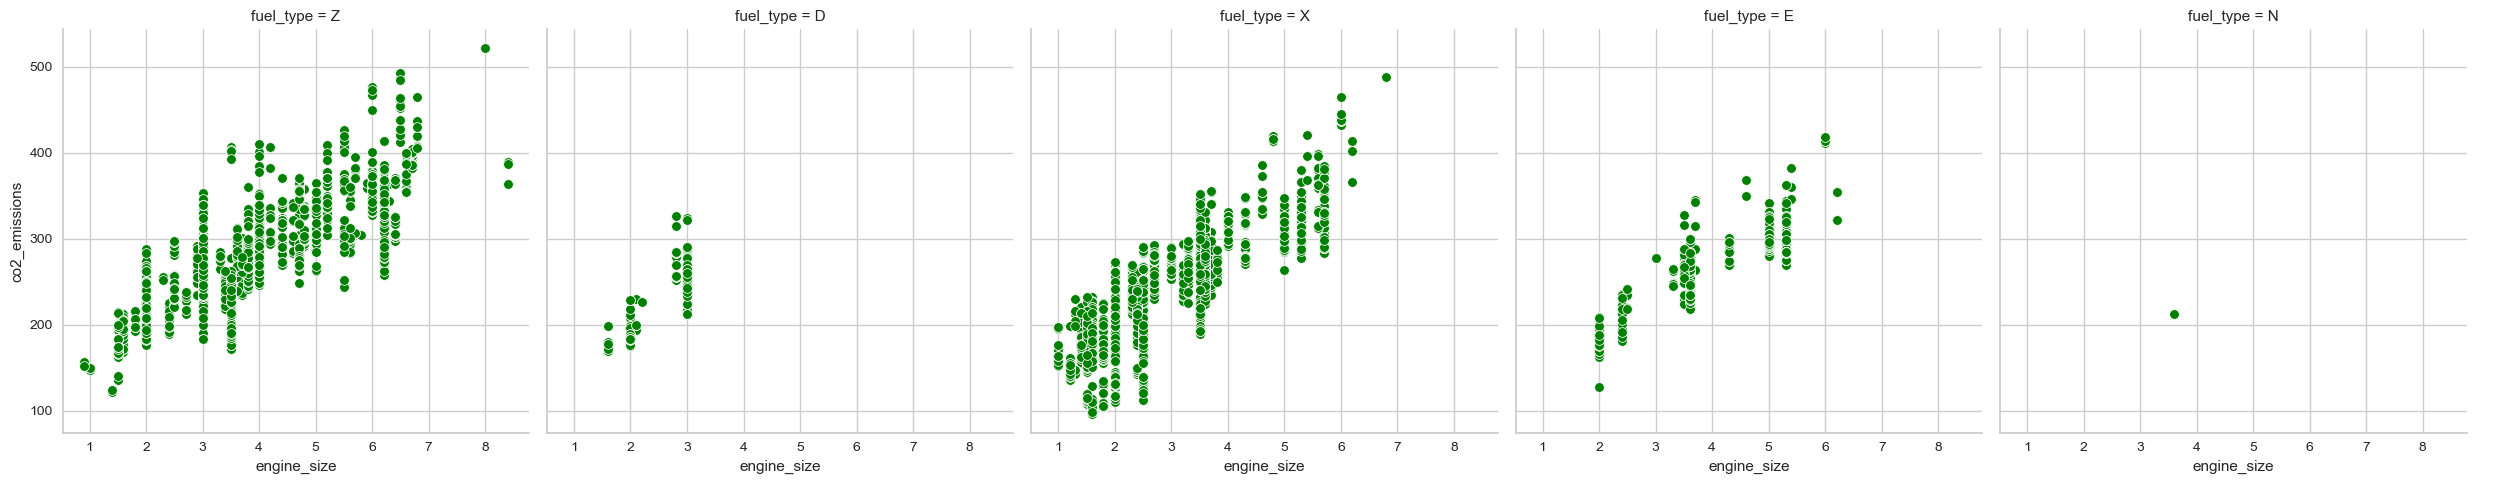

In [29]:
# FacetGrid: Relationship between engine size and CO2 according to fuel type
g = sns.FacetGrid(df, col='fuel_type', height=5, aspect=1)
g.map(sns.scatterplot, 'engine_size', 'co2_emissions', color='green')

g.add_legend()

plt.show()

<a id='simp-linear'></a>
# <font color='green'> <b>Simple Linear Regression Model</b><font color='black'> 

## <font color='#32CD32'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [32]:
X = df[["engine_size"]]
y = df["co2_emissions"]

## <font color='#32CD32'> <b>Train | Test Split</b><font color='black'>

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 101)

In [35]:
# Display the shapes of the resulting datasets

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (5025, 1)
X_test shape: (1257, 1)
y_train shape: (5025,)
y_test shape: (1257,)


## <font color='#32CD32'> <b>Training the Model</b><font color='black'>

In [37]:
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

## <font color='#32CD32'> <b>Predicting Test Data</b><font color='black'>

In [40]:
y_pred = model.predict(X_test)

In [41]:
model.coef_

array([37.33042902])

In [42]:
model.intercept_

133.12251238075737

In [43]:
# y = 37.33 * X + 133.12

## <font color='#32CD32'> <b>Evaluating the Model</b><font color='black'>

In [45]:
# Predicting with train data
y_train_pred = model.predict(X_train)

In [46]:
# Code blog that calculates and writes error metrics
def train_val(y_train, y_train_pred, y_test, y_pred, i): 
    
    scores = {
    i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}
    }
    
    return pd.DataFrame(scores)

In [47]:
slr = train_val(y_train, y_train_pred, y_test, y_pred, 'linear')
slr

,linear_train,linear_test
R2,0.726841,0.746665
mae,23.511680,22.352827
mse,969.583611,855.040468
rmse,31.138138,29.241075


In [48]:
avg_co2= df['co2_emissions'].mean()
avg_co2

251.1577523081821

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

29.24107500909609

In [50]:
rmse / avg_co2

0.11642513416514394

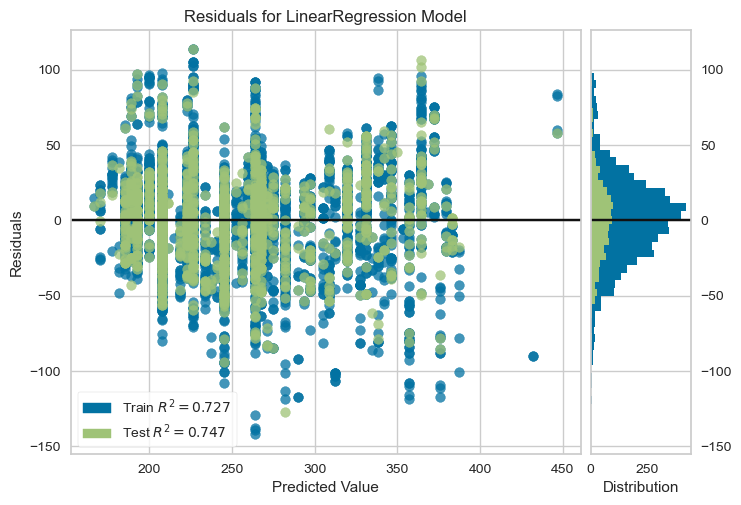

In [51]:
# linear model and visualizer

model = LinearRegression()
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

This graph visualizes the differences (residuals) between predicted and actual values.
- Train R² = 0.727, Test R² = 0.747
- The R² scores for the training and test sets are quite close, indicating that the model performs similarly well on unseen data and has not overfitted.

**Distribution:**
- Residuals should ideally be randomly distributed along the horizontal axis, indicating that the errors are independent and the linear regression assumption holds.
- In this graph, there is some clustering in certain regions (e.g., at lower predicted values), suggesting that the model may have systematic errors in these ranges.

**Histogram**
- The histogram of residuals appears to follow a near-normal distribution, which supports the assumption of normally distributed errors required by linear regression.

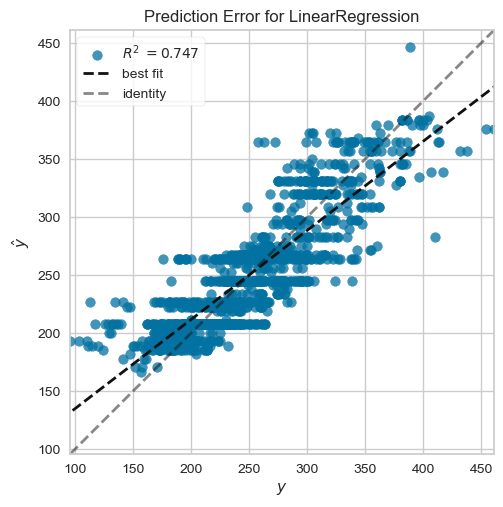

In [53]:
model = LinearRegression()

visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)   # Fit the training data to the visualizer
visualizer.score(X_test, y_test)   # Evaluate the model on the test data
visualizer.show();                 # Finalize and render the figure

- This graph shows the relationship between predicted values (ŷ) and actual values (y).
- R² = 0.747: The R² score for the test set indicates that the model explains approximately 74.7% of the variance in the target variable, which is a reasonable accuracy level.

**Identity Line**
- The blue points align closely with the identity line (y = ŷ), indicating good predictions. However, there are deviations, particularly at higher values, where the model's error seems to increase.
- These deviations suggest that the model's performance for higher values could be improved, potentially by using a more complex model or incorporating additional features.

<a id='multi-linear'></a>
# <font color='green'> <b>Multiple Linear Regression Model</b><font color='black'> 

## <font color='#32CD32'> <b>Splitting the dataset into X (independent variables) and y (dependent variable)</b><font color='black'>

In [57]:
X = df[["engine_size", "fuel_consumption_city", "fuel_consumption_hwy", "fuel_consumption_comb"]]
y = df["co2_emissions"]

## <font color='#32CD32'> <b>Train | Test Split</b><font color='black'>

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## <font color='#32CD32'> <b>Training the Model</b><font color='black'>

In [61]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## <font color='#32CD32'> <b>Predicting Test Data</b><font color='black'>

In [63]:
y_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

## <font color='#32CD32'> <b>Evaluating the Model</b><font color='black'>

In [65]:
def train_val(y_train, y_train_pred, y_test, y_pred, i):
    scores = {i+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
              
    i+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [66]:
mlr = train_val(y_train, y_train_pred, y_test, y_pred, "linear")
mlr

,linear_train,linear_test
R2,0.874900,0.865200
mae,13.697298,13.623371
mse,444.045081,454.968875
rmse,21.072377,21.329999


In [67]:
# Cross Validate (CV)
model = LinearRegression()

scores = cross_validate(estimator=model, X= X_train, y=y_train,
               scoring= ["r2", "neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error"],
               cv=10,
               return_train_score=True
              )

scores = pd.DataFrame(scores, index= range(1,11))
scores.iloc[:, 2:].mean() # CV sonrası değerler

test_r2                                0.874138
train_r2                               0.874917
test_neg_mean_absolute_error         -13.714858
train_neg_mean_absolute_error        -13.696662
test_neg_mean_squared_error         -445.463292
train_neg_mean_squared_error        -443.970002
test_neg_root_mean_squared_error     -21.088490
train_neg_root_mean_squared_error    -21.070380
dtype: float64

### Ridge

In [69]:
alpha_space = np.linspace(0.01, 1, 100)
param_grid = {"alpha": alpha_space}

ridge_model = Ridge()
grid_ridge = GridSearchCV(estimator= ridge_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_ridge.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [70]:
grid_ridge.best_params_

{'alpha': 1.0}

In [71]:
y_pred = grid_ridge.predict(X_test)
y_train_pred = grid_ridge.predict(X_train)

In [72]:
rm = Ridge(alpha= 1.0).fit(X_train, y_train)

In [73]:
rm = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rm

,ridge_train,ridge_test
R2,0.874900,0.865197
mae,13.696785,13.623003
mse,444.045094,454.978823
rmse,21.072378,21.330233


### Lasso

In [75]:
alpha_space = np.linspace(0.01, 1, 100)
param_grid = {"alpha": alpha_space}

lasso_model = Lasso()
grid_lasso = GridSearchCV(estimator= lasso_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_lasso.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ])},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [76]:
grid_lasso.best_params_

{'alpha': 0.01}

In [77]:
y_pred = grid_lasso.predict(X_test)
y_train_pred = grid_lasso.predict(X_train)

In [78]:
lss = Lasso(alpha=0.01).fit(X_train, y_train)

In [79]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso")
lss

,lasso_train,lasso_test
R2,0.874889,0.865074
mae,13.698533,13.633785
mse,444.083742,455.392552
rmse,21.073295,21.339929


### Elastic-Net

In [81]:
alpha_space = np.linspace(0.01, 1, 100)
param_grid = {"alpha": alpha_space,
             "l1_ratio":[0.1, 0.25, 0.5, 0.75, 0.9, 1]
             }

elastic_model = ElasticNet()
grid_elastic = GridSearchCV(estimator= elastic_model,
                          param_grid= param_grid,
                          scoring= "neg_root_mean_squared_error",
                          cv= 10,
                          verbose= 1,
                          return_train_score= True
                         )
grid_elastic.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99,
       1.  ]),
                         'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=1)

In [82]:
grid_elastic.best_params_

{'alpha': 0.01, 'l1_ratio': 0.1}

In [83]:
y_pred = grid_elastic.predict(X_test)
y_train_pred = grid_elastic.predict(X_train)

In [84]:
els = ElasticNet(alpha= 0.01, l1_ratio= 0.1).fit(X_train, y_train)

In [85]:
els = train_val(y_train, y_train_pred, y_test, y_pred, "elasticNet")
els

,elasticNet_train,elasticNet_test
R2,0.874894,0.865087
mae,13.673412,13.603861
mse,444.065250,455.351177
rmse,21.072856,21.338959


<a id='final-model'></a>
# <font color='green'> <b>Final Model and Prediction</b><font color='black'> 

In [87]:
pd.concat([mlr, rm, lss, els], axis=1)

,linear_train,linear_test,ridge_train,ridge_test,lasso_train,lasso_test,elasticNet_train,elasticNet_test
R2,0.874900,0.865200,0.874900,0.865197,0.874889,0.865074,0.874894,0.865087
mae,13.697298,13.623371,13.696785,13.623003,13.698533,13.633785,13.673412,13.603861
mse,444.045081,454.968875,444.045094,454.978823,444.083742,455.392552,444.065250,455.351177
rmse,21.072377,21.329999,21.072378,21.330233,21.073295,21.339929,21.072856,21.338959


**Evaluation Results:**
- There is not much difference between train and test values ​​for all models. This shows that there is no overfitting.
"- line"ar", rid"ge, an"d elasticN"et models perform almost the same. R², MAE, MSE, and RMSE values ​​of all of them are close to each other.
- The test results of t"he la"sso model are compatible with other models, but slightly higher MSE and RMSE values ​​are observed than other models.

**Which Model Should Be Chosen As The Final Model?**
- If simplicity and interpretability are important; **Linear Regression** may be preferred.
- If there is a regularization requirement (for example, if there is multicollinearity or high-dimensional data in the data set); **Ridge or ElasticNet** may be preferred.
- From a general performance perspective; **Linear, Ridge, and ElasticNet** models have almost the same performance. Any of them can be chosen.

**Conclusion**
- Elastic Net model was chosen as the final model.

In [91]:
final_model = ElasticNet(alpha=0.01, l1_ratio=0.1).fit(X, y)

In [92]:
y_pred = final_model.predict(X)
y_pred

array([202.4462219 , 222.89145161, 159.48510749, ..., 226.16707164,
       220.67282292, 231.06100103])

In [93]:
avg_co2 = df['co2_emissions'].mean()
avg_co2

251.1577523081821

In [94]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
rmse

21.120636888323144

New data:
- engine_size: 2.0
- fuel_consumption_city: 11.6
- fuel_consumption_hwy: 7.2
- fuel_consumption_comb: 10.4

In [96]:
new_data = [[2.0, 11.6, 7.2, 10.4]]

In [97]:
CO2 = final_model.predict(new_data)

CO2 = np.squeeze(CO2).round(1)

rate = rmse / avg_co2  
accuracy_rate = ((1 - rate) * 100).round(1)

print("The CO2 emissions of this vehicle will be around", CO2, "g/Km with an accuracy rate of", accuracy_rate)

The CO2 emissions of this vehicle will be around 221.8 g/Km with an accuracy rate of 91.6


<a id='conclusion'></a>
# <font color='green'> <b>Conclusion</b><font color='black'> 

The analyses and models conducted in this project have provided a better understanding of the key factors affecting CO2 emissions from vehicles. Exploratory data analysis revealed that engine size and fuel consumption have a significant impact on CO2 emissions. Predictions made using simple and multiple linear regression models yielded successful results, demonstrating consistency between data accuracy and model performance. Ultimately, this study offers valuable insights that can be utilized in designing and developing more efficient vehicles to reduce environmental impacts.

<p style="background-color:#32CD32;font-family:newtimeroman;font-size:200%;color:black;text-align:center;border-radius:20px 20px;"><b>THANK YOU!</b></p>